In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Linear Regression**

In [7]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [10]:
x = df.drop("logS", axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
643,3.61260,296.410,0.0,0.272727
722,6.48760,226.448,13.0,0.000000
570,3.15380,284.746,1.0,0.600000
66,0.77880,74.123,2.0,0.000000
1002,1.82140,102.177,3.0,0.000000
...,...,...,...,...
1044,2.82960,253.305,1.0,0.631579
1095,2.10750,218.322,3.0,0.000000
1130,4.14820,335.282,7.0,0.260870
860,4.25720,275.179,4.0,0.352941


In [12]:
x_test


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
218,1.55740,102.177,3.0,0.000000
809,5.20590,345.653,4.0,0.571429
501,4.18090,339.218,4.0,0.545455
649,2.05760,286.349,4.0,0.315789
323,0.72822,146.153,0.0,0.909091
...,...,...,...,...
361,-0.50840,59.068,0.0,0.000000
292,1.94750,116.204,3.0,0.000000
1119,2.16090,257.437,3.0,0.000000
557,3.36680,138.254,0.0,0.000000


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [16]:
y_lr_train_pred

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [17]:
y_lr_test_pred

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [21]:
lr_train_mse

1.0139894491573003

In [22]:
lr_train_r2

0.7695127746587307

In [23]:
lr_test_mse

0.9990844407075307

In [24]:
lr_test_r2

0.7705650058569231

In [28]:
lr_results = pd.DataFrame(("Linear regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2)).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


## **Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [30]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [35]:
rf_results = pd.DataFrame(("Random forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2)).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random forest,1.057186,0.759694,1.05209,0.758393


In [36]:
df_models = pd.concat((lr_results, rf_results), axis=0)

In [37]:
df_models

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random forest,1.057186,0.759694,1.05209,0.758393


In [38]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,Random forest,1.057186,0.759694,1.05209,0.758393


# **Scatter Plot**

Text(0.5, 0, 'Actual logS')

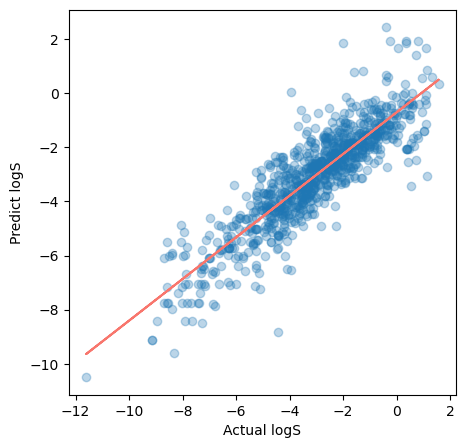

In [43]:
import matplotlib.pyplot as plt 
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x = y_train, y = y_lr_train_pred, alpha = 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), "#F8766D")
plt.ylabel("Predict logS")
plt.xlabel("Actual logS")